## UMIC CV & ML Assignment

### Chanakya Varude
### 210070092


### Q1)

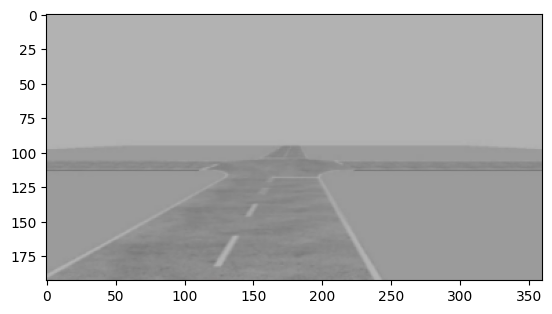

In [24]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# a function which converts our original image to a canny one (i.e the points with highest intensity change are highlighted)
def canny(lane_image):
    gray_image = cv2.cvtColor(lane_image, cv2.COLOR_BGR2GRAY)
    blur= cv2.GaussianBlur(gray_image,(5, 5),0)
    canny = cv2.Canny(blur, 40,100)
    return canny

#a function which masks some part, to have a region of interest.
def masking(image,height,width,midheight):
    print(image)
    triangle_mask = np.array([(0, height ), (width/2, midheight), (width,height)])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, np.int32([triangle_mask]), 255)
    masked_image = cv2.bitwise_and(canny, mask)
    return masked_image

#put your image path here
image = cv2.imread('lane_image.png') 
lane_image = np.copy(image)
#defining image properties
height =image.shape[0]-10
midheight= int((1/2)*height)
width=image.shape[1]

# the midheight can be optimized by looking at the set of input images, mostly 1/2 or 2/3 of height works
plt.imshow(lane_image,cmap='gray')
plt.show()

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


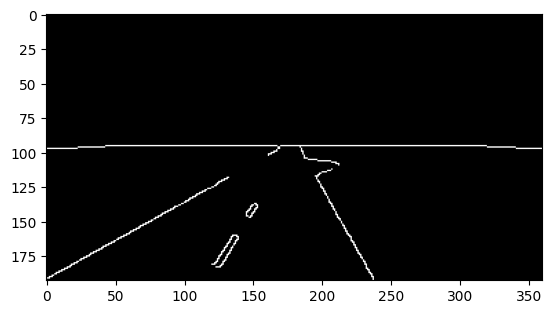

In [22]:
canny = canny(lane_image)
plt.imshow(canny,cmap='gray')
plt.show()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


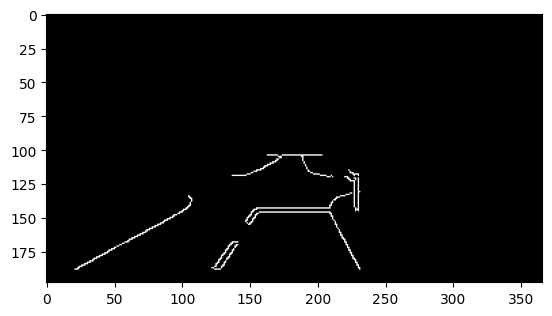

In [3]:
cropped_image = masking(canny,height,width,midheight)
plt.imshow(cropped_image,cmap='gray')
plt.show()

[[ 60 168 103 144]]
[[155 143 209 143]]
[[ 32 183 106 141]]
[[209 146 231 188]]
[[128 188 155 147]]
[[163 104 203 104]]


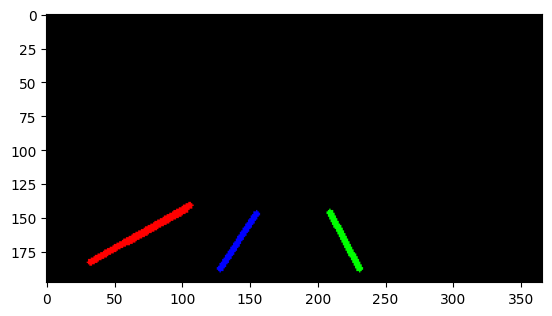

In [7]:
#time to go to the hough space, to find the best fit line for the points which were highlighted in the canny image
#we make lines with suitable conditions and parameters
lines = cv2.HoughLinesP(cropped_image,2,np.pi/180,25,np.array([]),minLineLength=40,maxLineGap=13)
line_image=np.zeros_like(image)
#we need these lists to identify the lane in which we are present (further needed)
rx=[]
lx=[]
for line in lines:
    #we divide the line table into 4 different columns
    x1,y1,x2,y2=line.reshape(4)
    m=(y2-y1)/(x2-x1)
    # if,else used as per the conditions to identify the color of the lane
    if min(x1,x2)<width/5:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),3)
        slope=(y2-y1)/(x2-x1)
        lx.append(min(x1,x2))
    elif (m>0):
        cv2.line(line_image,(x1,y1),(x2,y2),(0,255,0),3)
        rx.append(max(x1,x2))
    elif (m<0):
        #we dont want to mix the upper lines of the left most lane with the middle line, hence comes this conditions.
        if (m > (slope-0.01)):
            cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),3)
            lx.append(min(x1,x2))
        else:
            cv2.line(line_image,(x1,y1),(x2,y2),(0,0,255),3)

        
    print(line)
plt.imshow(line_image,cmap='gray')
plt.show()

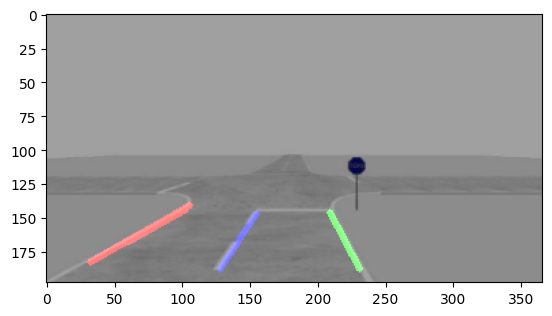

In [5]:
#we combine the lane image with the lines(had 0 intensity background) with appropriate weights
combined_image=cv2.addWeighted(lane_image,0.9,line_image,1,0)


#here is our final image with lanes detected according to the colors
plt.imshow(combined_image,cmap='gray')
plt.show()

In [6]:
#identifying the lane we are in

if (min(lx) < width/8):
    print("We are in the Right Lane")
elif (max(rx) > (width - width/8)):
    print("We are in the Left Lane")
else :
    print("Cannot determine, (Are you in the middle ?)")

We are in the Right Lane


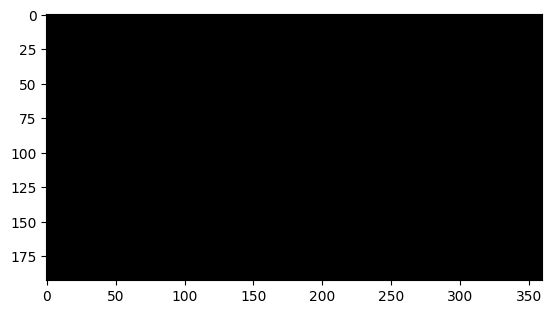

In [34]:
test=cv2.inRange(image,np.array([0,0,0]),np.array([255,255,255]))
plt.imshow(test,cmap="gray")
plt.show()

### Q4)

The following problem comes clearly under classification, cross-entropy loss function also known as the logistic loss function according to me would be the best loss function for the given problem. <br>
This loss function is defined as <br>
$L_{CE} = - \sum\limits _{i=1} ^{n} t_{i} log(pi)$<br>
for n classes
here $t_{i}$ is the truth label and pi is nothing but the Softmax probability for the $i$ th class. <br>
In neural networks softmax probability is used for a classification model, it is used to find the Output probabilities of the classes that is it converts the Logits which come as a result of the N layers finally into probabilities. And here When The Cross-entropy function is used, it compares the output probabilities with the true values, and checks out the error, so we want  $L_{CE}$ to be minimum, we obviously do these by changing the parameters(weights and biases) in the neural network. <br>

In the following case binary Cross-entropy classfication would be used, as we have two outputs them being black (0 or 0) or white(255 or 1) in every pixel of the image. It being a simple summation of the logs, requires lesser computation and obviously has faster convergence. If we were to use, RMSE we had to compute the summation of the square of the difference between each input's output and the observed output, this seems complicated and is not best for classification. Crossy-entropy function looks intuitive to work with, it has faster convergence, has great properties which makes work easy in backpropogation(especially with sigmoid activation functions), and most importantly helps with the gradient descent problem (where you get stuck in local minimas, and fail to reach the global minimas) which most of the neural networks suffer. 

In [2]:
import cv2
cv2.__version__

'4.6.0'